In [7]:
#Stemming: reducing inﬂected (or sometimes derived) words to their word stem, base or root form-generally a written word form 
library(SnowballC)
load("data/mymovies.RData")

In [4]:
wordStem(c("winner", "winners", "winning", "won"), language = "english")


[1] "winner" "winner" "win"    "won"

In [8]:
stemSentence <- function(x, language){
    x <- strsplit(x, "[[:blank:]]")[[1]]
    x <- wordStem(x, language)
    paste(x, collapse = " ")
}
mymovies$Plot[1]

[1] "Andy Dufresne is a young and successful banker whose life changes drastically when he is convicted and sentenced to life imprisonment for the murder of his wife and her lover. Set in the 1940s, the film shows how Andy, with the help of his friend Red, the prison entrepreneur, turns out to be a most unconventional prisoner."

In [9]:
stemSentence(mymovies$Plot[1], language = "english")

[1] "Andi Dufresn is a young and success banker whose life chang drastic when he is convict and sentenc to life imprison for the murder of his wife and her lover. Set in the 1940s, the film show how Andy, with the help of his friend Red, the prison entrepreneur, turn out to be a most unconvent prisoner."

In [10]:
#POS tagging: also called grammatical tagging or word-category disambiguation
# - is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech
# - based on both its deﬁnition, as well as its context-i.e. relationship with adjacent and related words in a phrase, sentence, or paragraph.
# Categories: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction and interjection.

In [12]:
# with UDPipe: Language-agnostic tokenisation, lemmatisation, POS tagging, dependency parsing
# - For more than 50 languages I Universal POS tags categories as deﬁned at
# http://universaldependencies.org/u/pos/index.html
install.packages("udpipe")
library(udpipe)
ud_model <- udpipe_download_model(language = "dutch")
ud_model <- udpipe_load_model(ud_model$file_model)
txt <- c("Ik ga op reis en ik neem mee, een tandenborstel, boeken en mijn goed humeur.", "Ik ga niet op reis. Mijn geld is op.")
x <- udpipe_annotate(ud_model, txt)
x <- as.data.frame(x)
str(x)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


'data.frame':	29 obs. of  14 variables:
 $ doc_id       : chr  "doc1" "doc1" "doc1" "doc1" ...
 $ paragraph_id : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sentence_id  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sentence     : chr  "Ik ga op reis en ik neem mee, een tandenborstel, boeken en mijn goed humeur." "Ik ga op reis en ik neem mee, een tandenborstel, boeken en mijn goed humeur." "Ik ga op reis en ik neem mee, een tandenborstel, boeken en mijn goed humeur." "Ik ga op reis en ik neem mee, een tandenborstel, boeken en mijn goed humeur." ...
 $ token_id     : chr  "1" "2" "3" "4" ...
 $ token        : chr  "Ik" "ga" "op" "reis" ...
 $ lemma        : chr  "ik" "ga" "op" "reis" ...
 $ upos         : chr  "PRON" "VERB" "ADP" "NOUN" ...
 $ xpos         : chr  "Pron|per|1|ev|nom" "V|intrans|ott|1|ev" "Prep|voor" "N|soort|ev|neut" ...
 $ feats        : chr  "Case=Nom|Number=Sing|Person=1|PronType=Prs" "Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Subcat=Intr|Tense=Pres|VerbForm=Fin" "AdpType=Prep" "Number=Sing"

In [13]:
library(NLP)
#help(Universal_POS_tags, package = "NLP")
Universal_POS_tags
Penn_Treebank_POS_tags

entry,description
VERB,verbs (all tenses and modes)
NOUN,nouns (common and proper)
PRON,pronouns
ADJ,adjectives
ADV,adverbs
ADP,adpositions (prepositions and postpositions)
CONJ,conjunctions
DET,determiners
NUM,cardinal numbers
PRT,particles or other function words


entry,description,examples
$,dollar,$ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
``,opening quotation mark,` ``
'',closing quotation mark,' ''
(,opening parenthesis,( [ {
),closing parenthesis,) ] }
",",comma,","
-,dash,-
.,sentence terminator,. ! ?
:,colon or ellipsis,: ; ...
CC,"conjunction, coordinating",& 'n and both but either et for less minus neither nor or plus so therefore times v. versus vs. whether yet


In [25]:
# with openNLPmodels.en/da/de/es/nl/pt/se
# - A series of models written in Apache OpenNLP (http://opennlp.sourceforge.net/models-1.5)
# - available as R packages at https://datacube.wu.ac.at
# install.packages('openNLPmodels.en', repos = "http://datacube.wu.ac.at", type = "source")
# - Gives POS tags based on the treebanks tags (English: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
install.packages("openNLP")
install.packages('openNLPmodels.en', repos = "http://datacube.wu.ac.at", type = "source")
library(NLP)
library(openNLP)
library(openNLPmodels.en) 

also installing the dependency ‘openNLPdata’

Warning message in install.packages("openNLP"):
“installation of package ‘openNLPdata’ had non-zero exit status”Warning message in install.packages("openNLP"):
“installation of package ‘openNLP’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(openNLP): there is no package called ‘openNLP’


In [ ]:
## Make sentence/word/POS annotators
sent_token_annotator <- Maxent_Sent_Token_Annotator(language = "en")
word_token_annotator <- Maxent_Word_Token_Annotator(language = "en")
pos_annotator <- Maxent_POS_Tag_Annotator(language = "en")
## Annotate the text s <- as.String(mymovies$Plot[1])
a1 <- NLP::annotate(s, sent_token_annotator)
a2 <- NLP::annotate(s, word_token_annotator, a=a1)
a3 <- NLP::annotate(s, pos_annotator, a=a2)
a3

In [18]:
# type of POS as data.frame
library(data.table)
taggedwords <- subset(a3, type == "word")
tags <- data.frame(term = s[taggedwords], 
                   pos.tag = sapply(taggedwords$features, FUN=function(x) head(x$POS, 1)), 
                                    stringsAsFactors=FALSE)
 head(tags)

ERROR: Error in subset(a3, type == "word"): object 'a3' not found


In [19]:
# Lemmatisation in linguistics is the process of grouping together the diﬀerent inﬂected forms of a word so they can be analysed as a single item 

In [20]:
# 1 udpipe for lemmatization
ud_model <- udpipe_download_model(language = "english")
ud_model <- udpipe_load_model(ud_model$file_model)
x <- udpipe_annotate(ud_model, x = mymovies$Plot[1:5])
x <- as.data.frame(x)
x[, c("token_id", "token", "lemma", "upos", "xpos", "dep_rel", "feats")]

token_id,token,lemma,upos,xpos,dep_rel,feats
1,Andy,Andy,PROPN,NNP,nsubj,Number=Sing
2,Dufresne,Dufresne,PROPN,NNP,flat,Number=Sing
3,is,be,AUX,VBZ,cop,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
4,a,a,DET,DT,det,Definite=Ind|PronType=Art
5,young,young,ADJ,JJ,amod,Degree=Pos
6,and,and,CCONJ,CC,cc,NA
7,successful,successful,ADJ,JJ,amod,Degree=Pos
8,banker,banker,NOUN,NN,root,Number=Sing
9,whose,whose,PRON,WP$,nmod:poss,Poss=Yes|PronType=Int
10,life,life,NOUN,NN,nsubj,Number=Sing


In [26]:
# using pattern for POS
devtools::install_github("bnosac/pattern.nlp", args = "--no-multiarch")
library(pattern.nlp)
txt <- "Dus godvermehoeren met pus in alle puisten, 
zei die schele van Van Bukburg en hij had nog gelijk ook. 
Er was toen dat liedje van tietenkonttieten kont tieten kontkontkont, 
maar dat hoefden we geenseens niet te zingen"
pattern_pos(x = txt, language = 'dutch', core = TRUE)

from URL https://api.github.com/repos/bnosac/pattern.nlp/zipball/master
Installation failed: error in running command


ERROR: Error in library(pattern.nlp): there is no package called ‘pattern.nlp’


In [27]:
# Dependency is the notion that linguistic units, e.g. words, are connected to each other by directed links which have a speciﬁc relation.
library(udpipe)
x <- udpipe_annotate(ud_model, "The economy is weak but the outlook is bright")
x <- as.data.frame(x)
x[, c("token_id", "token", "head_token_id", "dep_rel")]

token_id,token,head_token_id,dep_rel
1,The,2,det
2,economy,4,nsubj
3,is,4,cop
4,weak,0,root
5,but,9,cc
6,the,7,det
7,outlook,9,nsubj
8,is,9,cop
9,bright,4,conj



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



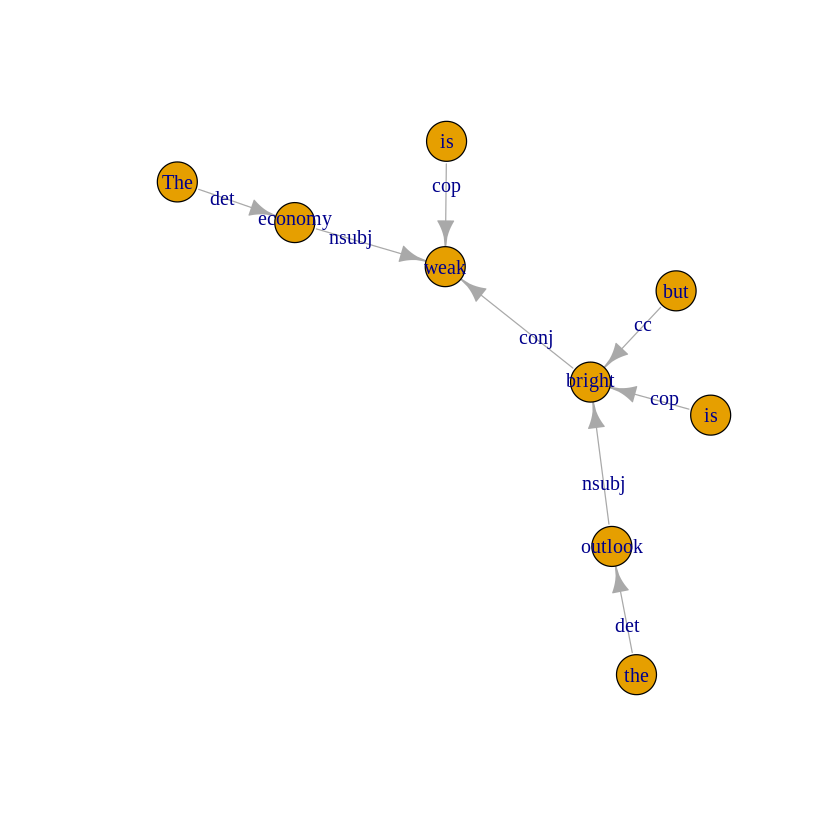

In [28]:
library(igraph)
edges <- subset(x, head_token_id != 0, select = c("token_id", "head_token_id", "dep_rel"))
edges$label <- edges$dep_rel
g <- graph_from_data_frame(edges, vertices = x[, c("token_id", "token", "lemma", "upos")], directed = TRUE)
plot(g, vertex.label = x$token)

In [29]:
load("data/mymovies_consensus.RData")
head(mymovies_consensus[, c("doc_id", "sentence_id", "token", "lemma", "upos")])

doc_id,sentence_id,token,lemma,upos
The Shawshank Redemption,1,The,the,DET
The Shawshank Redemption,1,Shawshank,Shawshank,PROPN
The Shawshank Redemption,1,Redemption,Redemption,PROPN
The Shawshank Redemption,1,is,be,AUX
The Shawshank Redemption,1,an,a,DET
The Shawshank Redemption,1,uplifting,uplifting,NOUN


In [30]:
# Co-occurrences show how many times word occur together
library(udpipe)
## Nouns in the same sentence
cooc <- cooccurrence(subset(mymovies_consensus, upos %in% "NOUN"), group = c("doc_id", "sentence_id"), term = "lemma")
## Nouns/adverbs next to each other
cooc <- cooccurrence(mymovies_consensus$lemma, relevant = mymovies_consensus$upos %in% c("NOUN", "ADJ"))
## Nouns/adverbs next to each other even if we would skip 2 words
cooc <- cooccurrence(mymovies_consensus$lemma, relevant = mymovies_consensus$upos %in% c("NOUN", "ADJ"), skipgram = 2)
head(cooc)

term1,term2,cooc
special,effect,62
strong,performance,51
sci,fi,50
talented,cast,41
action,sequence,30
romantic,comedy,30


In [31]:
# RAKE
stats <- keywords_rake(x = mymovies_consensus, term = "lemma", group = c("doc_id", "sentence_id"), relevant = mymovies_consensus$upos %in% c("NOUN", "ADJ"))
head(subset(stats, freq > 5))

,keyword,ngram,freq,rake
7,special effect,2,31,2.841461
9,romantic comedy,2,8,2.711952
18,action sequence,2,16,2.584211
21,source material,2,18,2.507740
34,social commentary,2,7,2.363636
51,strong performance,2,40,2.144602


In [32]:
# detect phrases
mymovies_consensus$phrase_tag <- as_phrasemachine(mymovies_consensus$upos, type = "upos")
stats <- keywords_phrases(x = mymovies_consensus$phrase_tag, 
                          term = mymovies_consensus$token, 
                          pattern = "(A|N)*N(P+D*(A|N)*N)*", 
                          is_regex = TRUE, 
                          detailed = FALSE)
head(subset(stats, freq < 100 & ngram > 1))

,keyword,ngram,freq
40,special effects,2,63
63,talented cast,2,39
75,its predecessor,2,36
94,strong performances,2,31
102,action sequences,2,29
109,source material,2,28


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: RColorBrewer


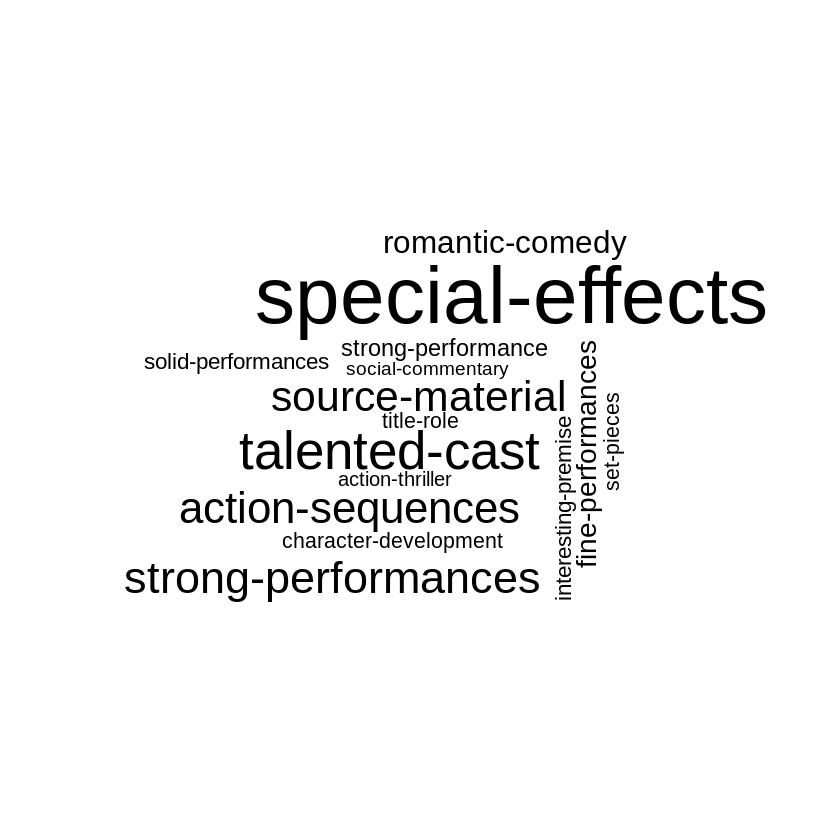

In [35]:
# textrank
install.packages("textrank")
library(textrank)
library(wordcloud)
stats <- textrank_keywords(mymovies_consensus$token, relevant = mymovies_consensus$upos %in% c("NOUN", "ADJ"))
stats <- subset(stats$keywords, freq > 5 & ngram > 1)
wordcloud(words = stats$keyword, freq = stats$freq, max.words = 15)

In [36]:
# Collocations is a sequence of words or terms that co-occur more often than would be expected by chance
# PMI
# MD
# LFMD
stats <- keywords_collocation(x = mymovies_consensus, 
                              term = "lemma", 
                              group = c("doc_id", "sentence_id"))
head(subset(stats, freq > 5))

,keyword,ngram,left,right,freq,freq_left,freq_right,pmi,md,lfmd
30,Leonardo DiCaprio,2,Leonardo,DiCaprio,6,6,6,13.51785,0.0000000,-13.51785
35,Eddie Murphy,2,Eddie,Murphy,6,6,6,13.51785,0.0000000,-13.51785
36,Sylvester Stallone,2,Sylvester,Stallone,6,6,6,13.51785,0.0000000,-13.51785
50,Matt Damon,2,Matt,Damon,8,8,8,13.10282,0.0000000,-13.10282
54,Angelina Jolie,2,Angelina,Jolie,8,8,8,13.10282,0.0000000,-13.10282
56,Matthew McConaughey,2,Matthew,McConaughey,6,8,6,13.10282,-0.4150375,-13.93289


In [37]:
# textrank to summarize sentences
data(joboffer)
sentences <- unique(joboffer[, c("sentence_id", "sentence")])
terminology <- subset(joboffer, upos %in% c("NOUN", "ADJ"))
stats <- textrank_sentences(data = sentences, terminology = terminology[, c("sentence_id", "lemma")])
stats

Textrank on sentences, showing top 5 most important sentences found:
  1. Building the report on the data analysis.
  2. You have a strong interest in statistics and data analysis.
  3. BNOSAC (Belgium Network of Open Source Analytical Consultants), is a Belgium consultancy company specialized in data analysis and statistical consultancy using open source tools.
  4. The usage of a diverse range of statistical & data science techniques.
  5. In order to increase and enhance the services provided to our clients, we are on the lookout for an all-round statistical expert, data scientist and analytical developer.

In [38]:
# Named-entity recognition (NER) (also known as entity identiﬁcation, entity chunking and entity extraction) is a subtask of information extraction that seeks to locate and classify elements in text into pre-deﬁned categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc 
library(NLP)
library(openNLP)
library(openNLPmodels.en)

ERROR: Error in library(openNLP): there is no package called ‘openNLP’


In [39]:
s <- as.String(mymovies$Plot[1])
## Need sentence and word token annotations before finding persons
sent_token_annotator <- Maxent_Sent_Token_Annotator(language = "en")
word_token_annotator <- Maxent_Word_Token_Annotator(language = "en")
personannotator <- Maxent_Entity_Annotator(language = "en", kind = "person", probs = FALSE)
a1 <- NLP::annotate(s, sent_token_annotator)
a2 <- NLP::annotate(s, word_token_annotator, a=a1)
a3 <- NLP::annotate(s, personannotator, a=a2)
a3

ERROR: Error in Maxent_Sent_Token_Annotator(language = "en"): could not find function "Maxent_Sent_Token_Annotator"


In [40]:
tags <- data.frame(term = s[a3], 
                   is.person = sapply(a3$features, FUN=function(x){ "kind" %in% names(x) && x$kind %in% "person" }), 
                   stringsAsFactors=FALSE)
subset(tags, is.person == TRUE)

ERROR: Error in inherits(x, "Span"): object 'a3' not found


In [ ]:
# exercises
# exercise 1: Get all nouns from the movie plots / brussels reviews client feedback 
movie_nouns <- ""

In [ ]:
# exercise 2: Get collocations and keywords from the movie plots / brussels reviews client feedback and plot these

In [ ]:
# 3: Can you get which nouns and adjectives are collocated in the movie feedback 

In [ ]:
# 4: Get all persons from the movie plots 

In [ ]:
# 5: Read in the jeopardy.csv dataset and see how many time a place is occuring in the questions 

In [ ]:
# 6:  Recode all words to their lemma’s in the movie plots